In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [19]:
#importing data with all 
df = pd.read_csv('df_plzCLEAN.csv')

In [20]:
df.head()

,Loan Status,Current Loan Amount,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in Current Job,Credit Rating,LoanStatus,Credit Score,Monthly Income
0,Fully Paid,445412.0,1.167493e+06,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,8.0,Good,0,709.000000,97291.083333
1,Fully Paid,262328.0,1.378277e+06,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0,10.0,Good,0,724.620939,114856.379987
2,Fully Paid,99999999.0,2.231892e+06,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,8.0,Very Good,0,741.000000,185991.000000
3,Fully Paid,347666.0,8.069490e+05,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,3.0,Good,0,721.000000,67245.750000
4,Fully Paid,176220.0,1.378277e+06,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,5.0,Good,0,724.620939,114856.379987


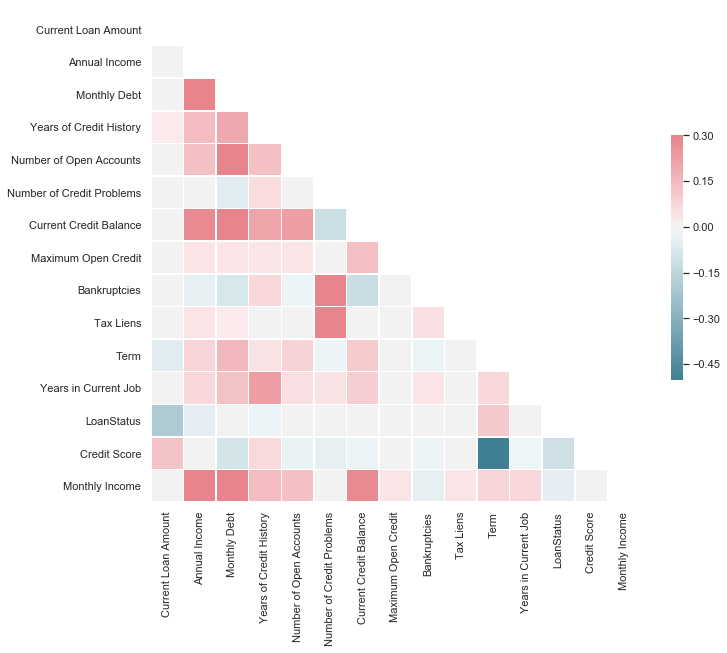

In [21]:
import numpy as np

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
mean = df['Current Loan Amount'].mean()
std = df['Current Loan Amount'].std()
toprange = mean + std*1.96
newdf = df.copy()
newdf = newdf.drop(newdf[newdf['Current Loan Amount']>toprange].index)

In [25]:
newdf['Current Loan Amount'].describe()

count     88337.000000
mean     312507.036100
std      186292.362025
min       15422.000000
25%      172414.000000
50%      267454.000000
75%      432784.000000
max      789250.000000
Name: Current Loan Amount, dtype: float64

In [26]:
newdf.head()

,Loan Status,Current Loan Amount,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in Current Job,Credit Rating,LoanStatus,Credit Score,Monthly Income
0,Fully Paid,445412.0,1.167493e+06,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,8.0,Good,0,709.000000,97291.083333
1,Fully Paid,262328.0,1.378277e+06,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0,10.0,Good,0,724.620939,114856.379987
3,Fully Paid,347666.0,8.069490e+05,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,3.0,Good,0,721.000000,67245.750000
4,Fully Paid,176220.0,1.378277e+06,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,5.0,Good,0,724.620939,114856.379987
5,Charged Off,206602.0,8.968570e+05,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0,10.0,Good,1,729.000000,74738.083333


In [28]:
newdf.to_csv('df_rllyclean.csv', index=False)


In [32]:
newdf['Monthly Debt'].describe()

count     88337.000000
mean      18524.903547
std       12172.210831
min           0.000000
25%       10270.260000
50%       16282.240000
75%       24069.960000
max      435843.280000
Name: Monthly Debt, dtype: float64

In [39]:
newdf['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [40]:
from sklearn.cluster import KMeans 

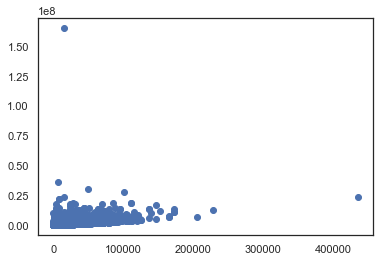

In [75]:
df4 = pd.read_csv('df_cleaned2.csv')
plt.scatter(df4['Monthly Debt'], df4['Annual Income'])

In [76]:
df4 = df4.drop(df4[df4['Annual Income']>150000000].index)
df4['Annual Income'].describe()

count    7.727000e+04
mean     1.397062e+06
std      9.214715e+05
min      7.662700e+04
25%      8.625050e+05
50%      1.202263e+06
75%      1.677339e+06
max      3.647544e+07
Name: Annual Income, dtype: float64

In [78]:
df4 = df4.drop(df4[df4['Monthly Debt']>200000].index)
df4['Monthly Debt'].describe()

count     77267.000000
mean      18745.172621
std       12158.475586
min           0.000000
25%       10478.215000
50%       16474.520000
75%       24300.525000
max      173265.560000
Name: Monthly Debt, dtype: float64

In [73]:
#mean = df4['Monthly Debt'].mean()
#std = df4['Monthly Debt'].std()
#toprange = mean + std*1.96
#df4 = df4.copy()
#df4 = df4.drop(df4[df4['Monthly Debt']>toprange].index)

In [69]:
#mean = df3['Annual Income'].mean()
#std = df3['Annual Income'].std()
#toprange = mean + std*1.96
#df4 = df3.copy()
#df4 = df4.drop(df4[df4['Current Loan Amount']>toprange].index)

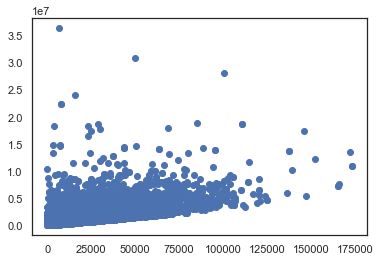

In [79]:
plt.scatter(df4['Monthly Debt'], df4['Annual Income'])

In [80]:
df5 = df4.copy()
df5.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Credit_Score', 'Credit Rating', 'Years in Current Job',
       'Loan_Status', 'term'],
      dtype='object')

In [ ]:
df5 = df5.drop('Loan Status', axis=1)
df5 = df5.drop('Current Loan Amount', axis=1)
df5 = df5.drop('Term', axis=1)
df5 = df5.drop('Home Ownership', axis=1)
df5 = df5.drop('Purpose', axis=1)
df5 = df5.drop('Years of Credit History', axis=1)
df5 = df5.drop('Number of Open Accounts', axis=1)
df5 = df5.drop('Number of Credit Problems', axis=1)
df5 = df5.drop('Current Credit Balance', axis=1)
df5 = df5.drop('Bankruptcies', axis=1)
df5 = df5.drop('Tax Liens', axis=1)
df5 = df5.drop('Credit_Score', axis=1)
df5 = df5.drop('Credit Rating', axis=1)
df5 = df5.drop('Years in Current Job', axis=1)
df5 = df5.drop('Loan_Status', axis=1)

In [107]:
df5 = df5.drop('Maximum Open Credit', axis=1)
X = df5.drop('term', axis=1)

 
X.head()

KeyError: "['Maximum Open Credit'] not found in axis"

In [100]:
y = df4['Loan_Status'].copy()
y.unique()

array([0, 1], dtype=int64)

In [101]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [102]:
print(kmeans.cluster_centers_)

[[1140505.85073022   16561.48947914]
 [2985392.2033012    32296.51188846]]


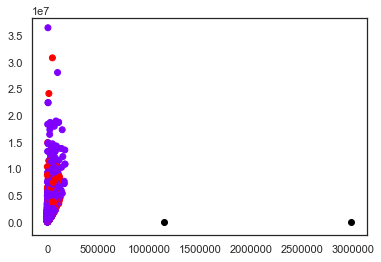

In [103]:
plt.scatter(df4['Monthly Debt'], df4['Annual Income'], c=df4['Loan_Status'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [105]:
df5['cluster'] = kmeans.labels_
df5 = df5

In [106]:
df5.head()

,Annual Income,Monthly Debt,term,cluster
0,1167493,5214.74,0,0
1,2231892,29200.53,0,1
2,806949,8741.90,1,0
3,896857,16367.74,0,0
4,1184194,10855.08,0,0


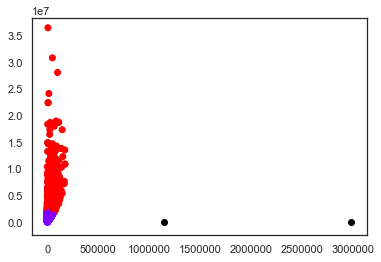

In [111]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(df4['Monthly Debt'],df4['Annual Income'], c=df5['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')